Task 1 : Exploratory Data Analysis (EDA) on Retail Sales Data

Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


Importing dataset

In [2]:
data = pd.read_csv('retail_sales_dataset.csv')
retail_data = data.copy()
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Data Exploration

In [3]:
retail_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [4]:
retail_data.drop_duplicates().tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [5]:
retail_data.shape

(1000, 9)

In [6]:
retail_data = retail_data.drop_duplicates()
retail_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [6]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [7]:
retail_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Detecting outliers within data distributions

In [8]:
def findOutliers(data):
    anomalies = []
    std_data = data.std()
    mean_data = data.mean()
    outlier_cutoff = std_data*3
    lower_limit = mean_data - outlier_cutoff
    upper_limit = mean_data + outlier_cutoff

    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [9]:
sorted(findOutliers(retail_data['Price per Unit']))

[]

<Axes: ylabel='Price per Unit'>

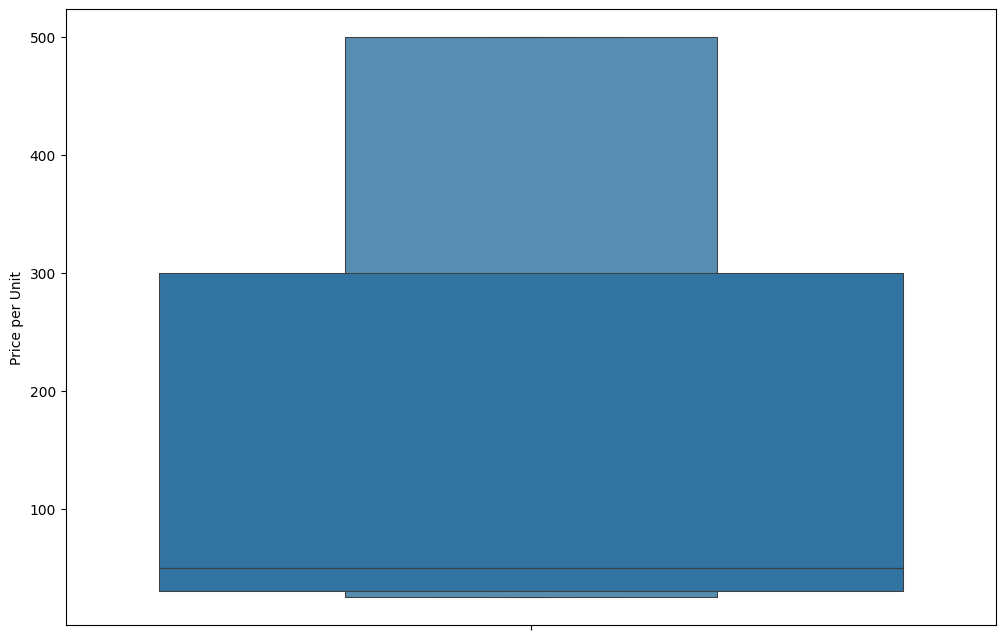

In [10]:
plt.figure(figsize=(12,8))
sns.boxenplot(retail_data['Price per Unit'])

<Axes: ylabel='Total Amount'>

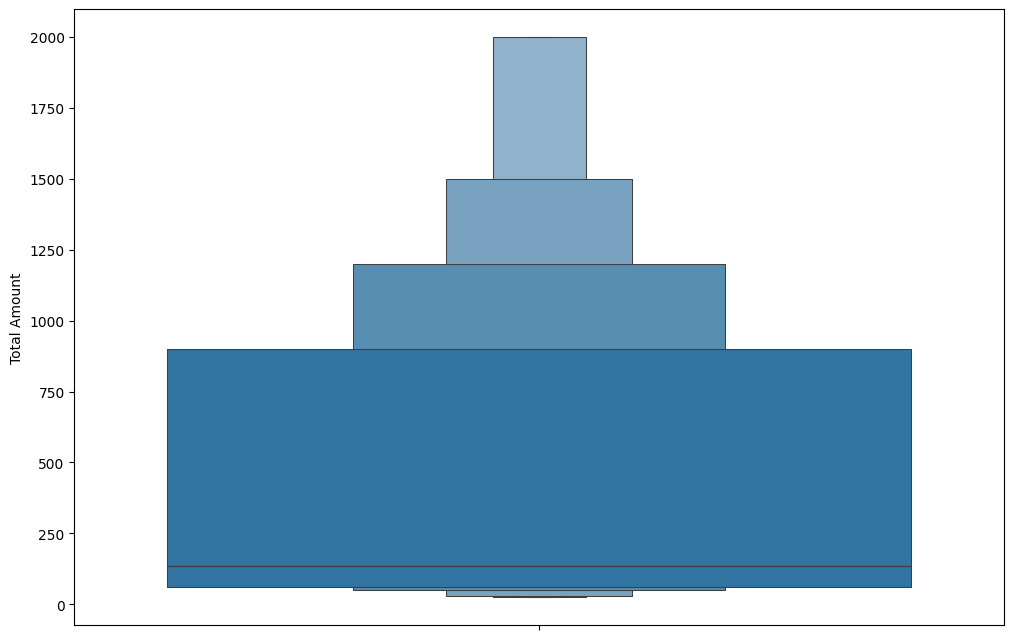

In [11]:
plt.figure(figsize=(12,8))
sns.boxenplot(retail_data['Total Amount'])

Product Category Analysis

<Axes: title={'center': 'Total Sales by Product Category'}, xlabel='Product Category'>

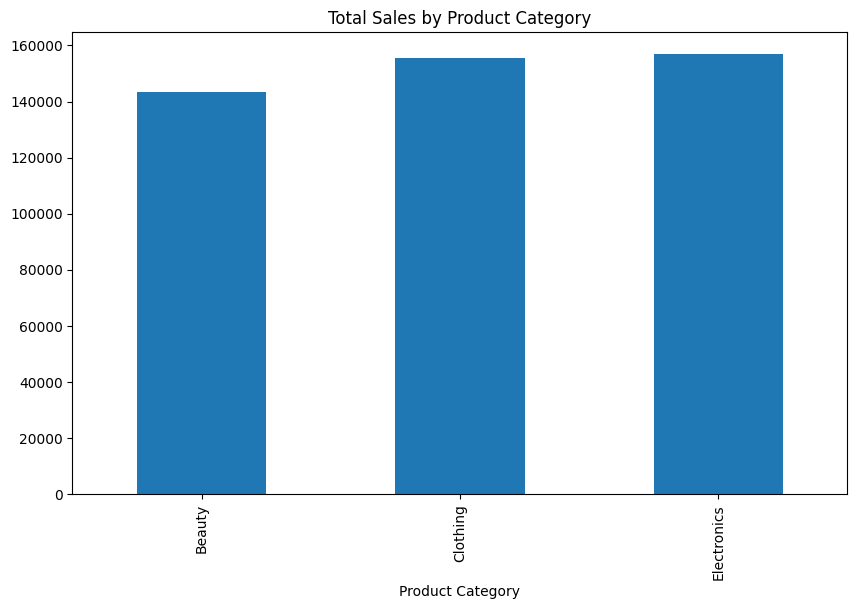

In [12]:
product_sales = retail_data.groupby('Product Category')['Total Amount'].sum()
product_sales.plot(kind='bar', figsize=(10,6), title="Total Sales by Product Category")


Customer Demographics Analysis

<Axes: title={'center': 'Total Sales by Gender'}, xlabel='Gender'>

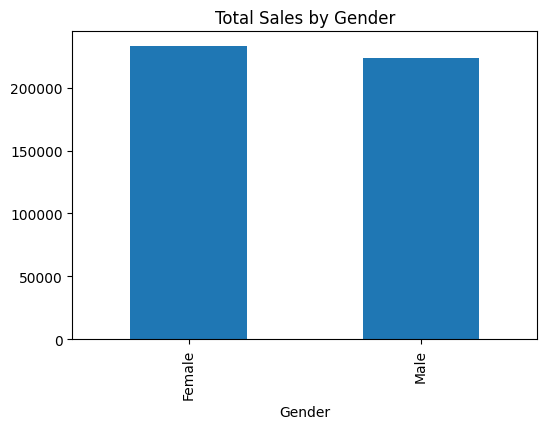

In [13]:
gender_sales = retail_data.groupby('Gender')['Total Amount'].sum()
gender_sales.plot(kind='bar', figsize=(6,4), title="Total Sales by Gender")


<Axes: title={'center': 'Total Sales by Age Group'}, xlabel='Age Group'>

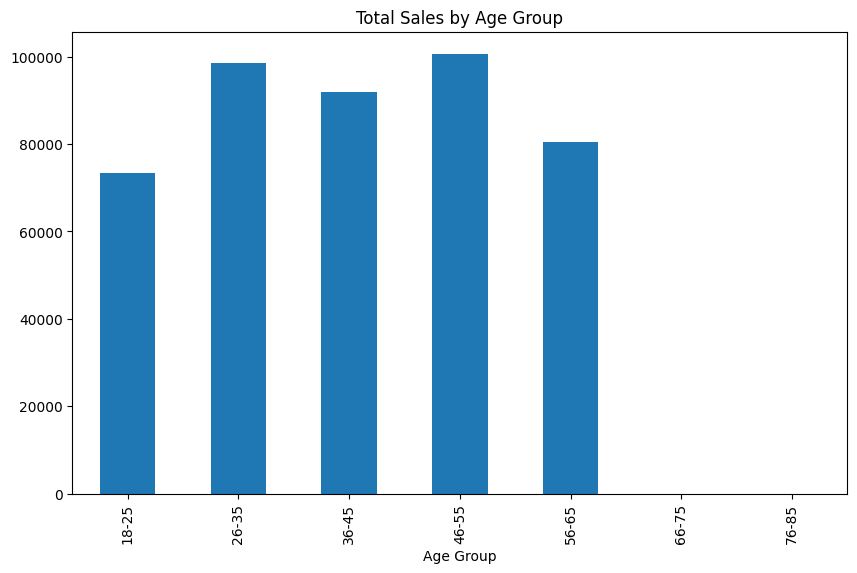

In [14]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
retail_data['Age Group'] = pd.cut(retail_data['Age'], bins=age_bins, labels=age_labels)
age_sales = retail_data.groupby('Age Group')['Total Amount'].sum()
age_sales.plot(kind='bar', figsize=(10,6), title="Total Sales by Age Group")


Quantity and Price Analysis

<Axes: title={'center': 'Quantity vs Total Amount'}, xlabel='Quantity', ylabel='Total Amount'>

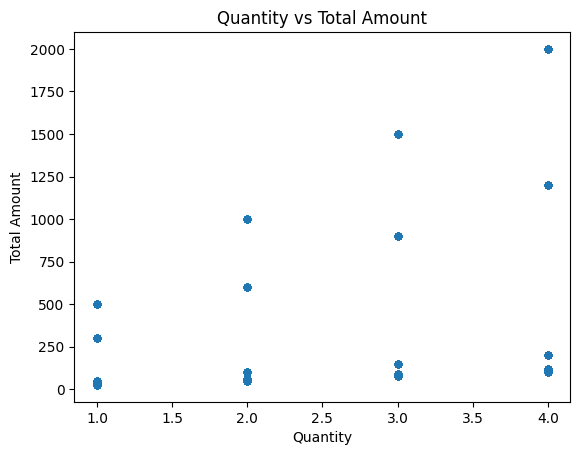

In [15]:
retail_data.plot.scatter(x='Quantity', y='Total Amount', title="Quantity vs Total Amount")


<Axes: title={'center': 'Price per Unit vs Total Amount'}, xlabel='Price per Unit', ylabel='Total Amount'>

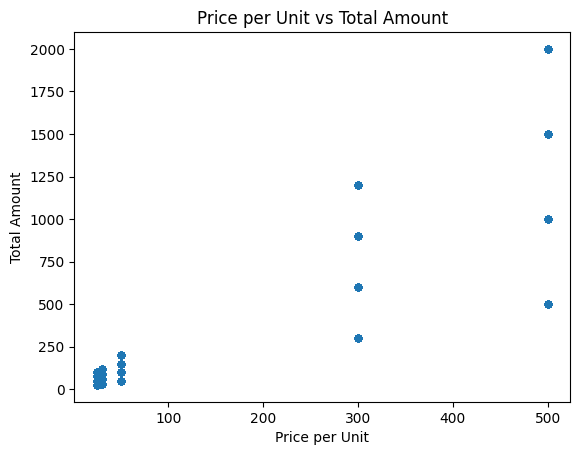

In [16]:
retail_data.plot.scatter(x='Price per Unit', y='Total Amount', title="Price per Unit vs Total Amount")


Correlations Between Numerical Variables

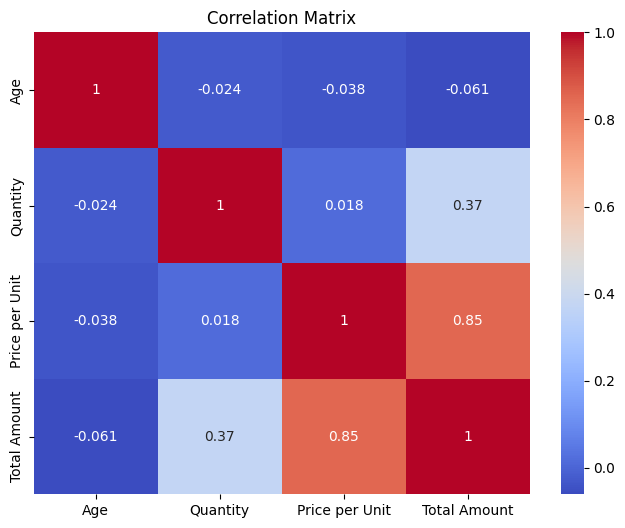

In [17]:


corr_matrix = retail_data[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Convert the Date Column to Datetime

In [18]:
retail_data['Date'] = pd.to_datetime(retail_data['Date'])


Sales Trends Over Time

<Axes: title={'center': 'Sales Over Time'}, xlabel='Date'>

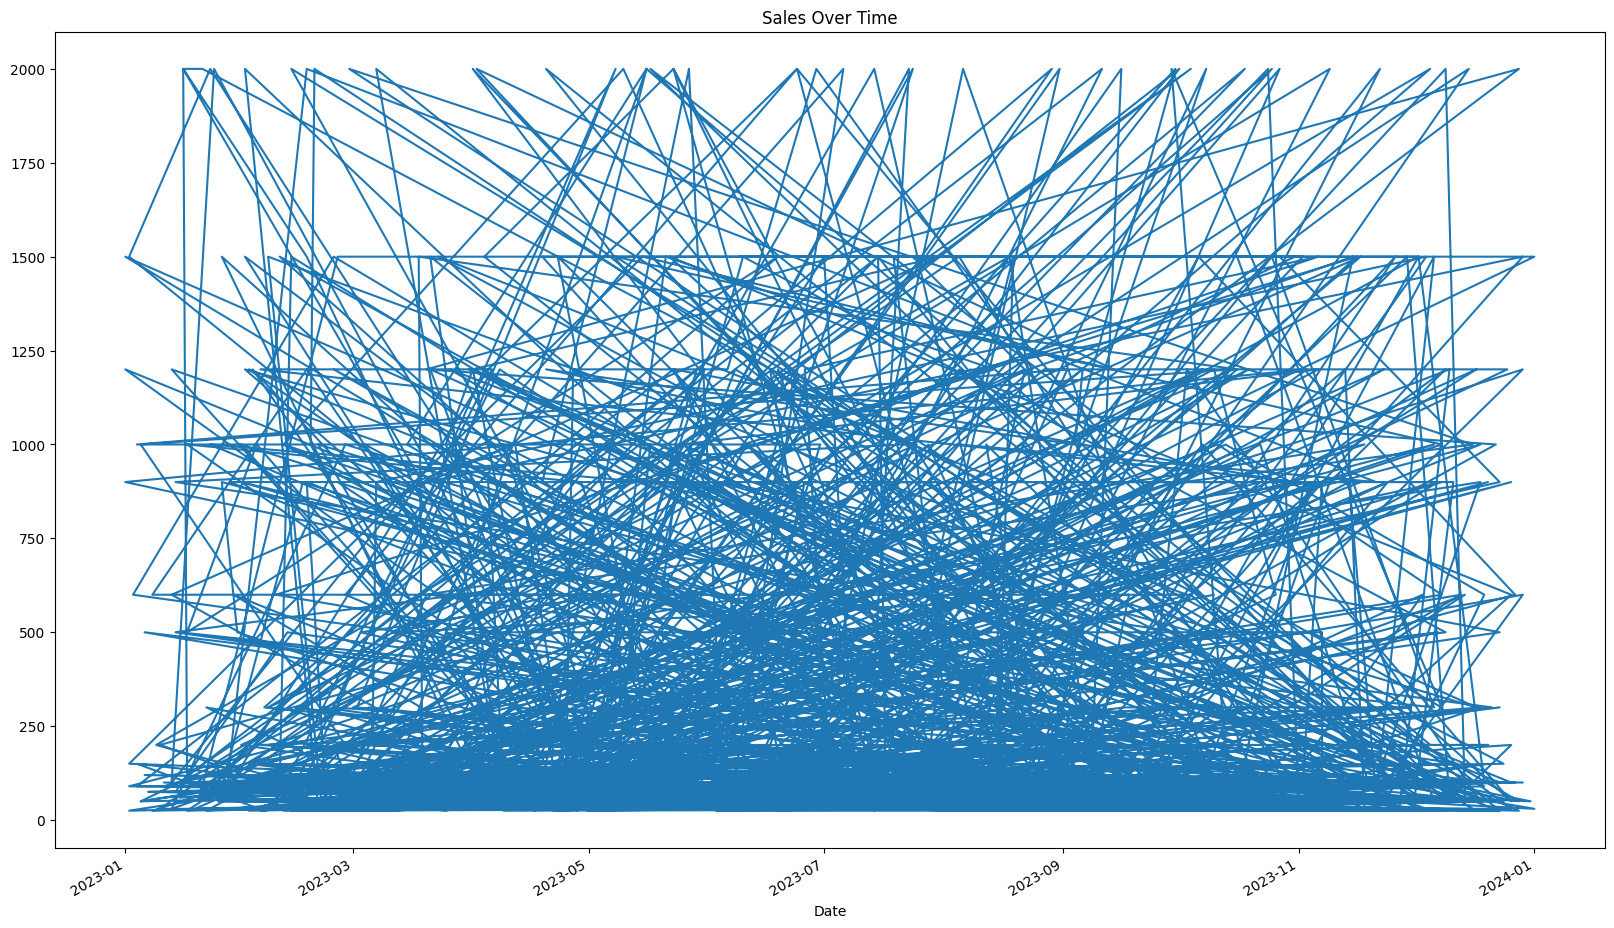

In [19]:
retail_data.set_index('Date', inplace=True)
retail_data['Total Amount'].plot(figsize=(20,12), title="Sales Over Time")


Time Series Analysis

Sales Trends by Month

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='Date'>

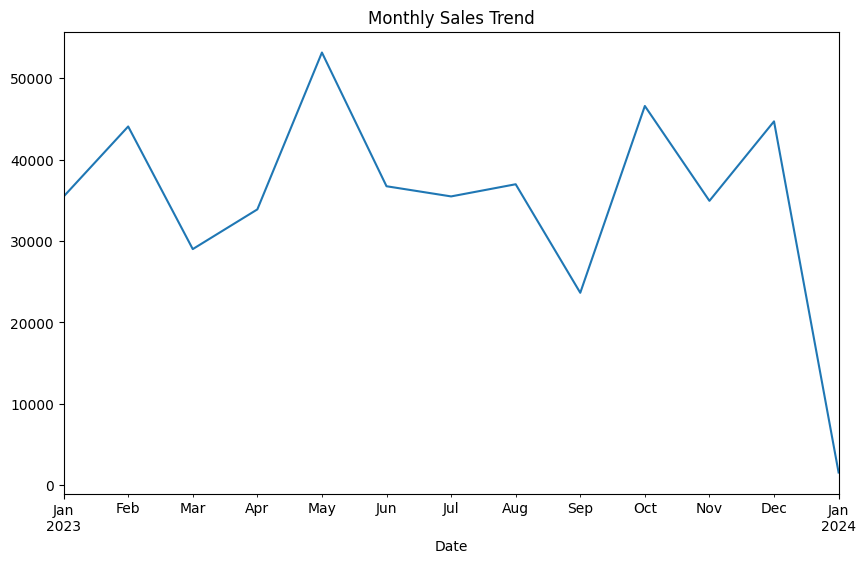

In [20]:
monthly_sales = retail_data.resample('M')['Total Amount'].sum()
monthly_sales.plot(figsize=(10,6), title="Monthly Sales Trend")


Day of Week Sales Trends

<Axes: title={'center': 'Total Sales by Day of the Week'}, xlabel='Day of Week'>

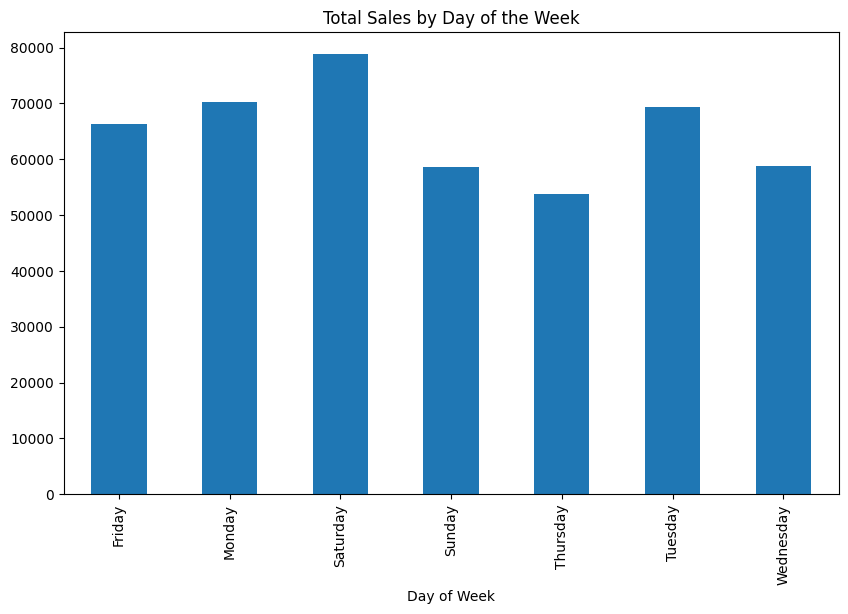

In [21]:
retail_data['Day of Week'] = retail_data.index.day_name()
weekday_sales = retail_data.groupby('Day of Week')['Total Amount'].sum()
weekday_sales.plot(kind='bar', figsize=(10,6), title="Total Sales by Day of the Week")


Customer Segmentation

Age Group Segmentation

<Axes: title={'center': 'Sales by Age Group'}, xlabel='Age Group'>

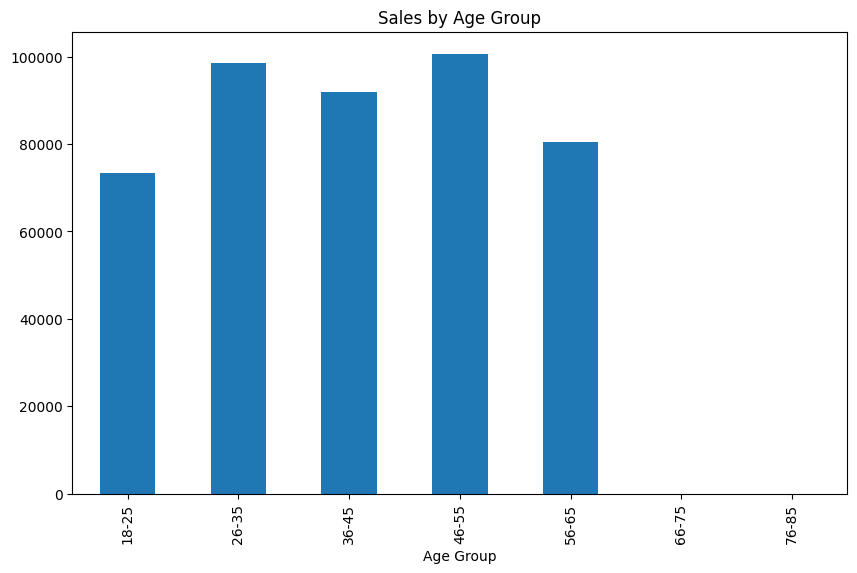

In [22]:
age_group_sales = retail_data.groupby('Age Group')['Total Amount'].sum()
age_group_sales.plot(kind='bar', figsize=(10,6), title="Sales by Age Group")


High-Value Customers

<Axes: title={'center': 'Top 10 High-Spending Customers'}, xlabel='Customer ID'>

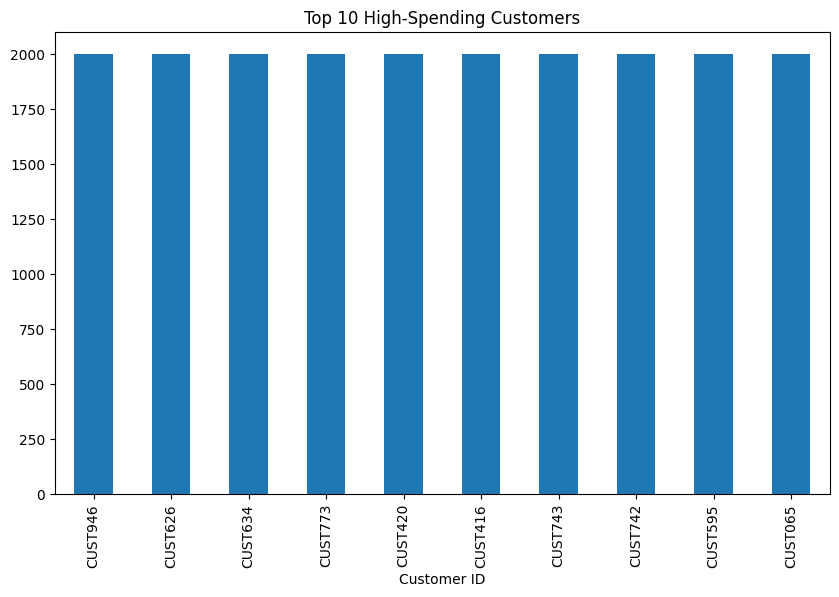

In [23]:
customer_sales = retail_data.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False)
customer_sales.head(10).plot(kind='bar', figsize=(10,6), title="Top 10 High-Spending Customers")


Product and Quantity Analysis

Most Popular Products

<Axes: title={'center': 'Most Popular Product Categories by Sales'}, xlabel='Product Category'>

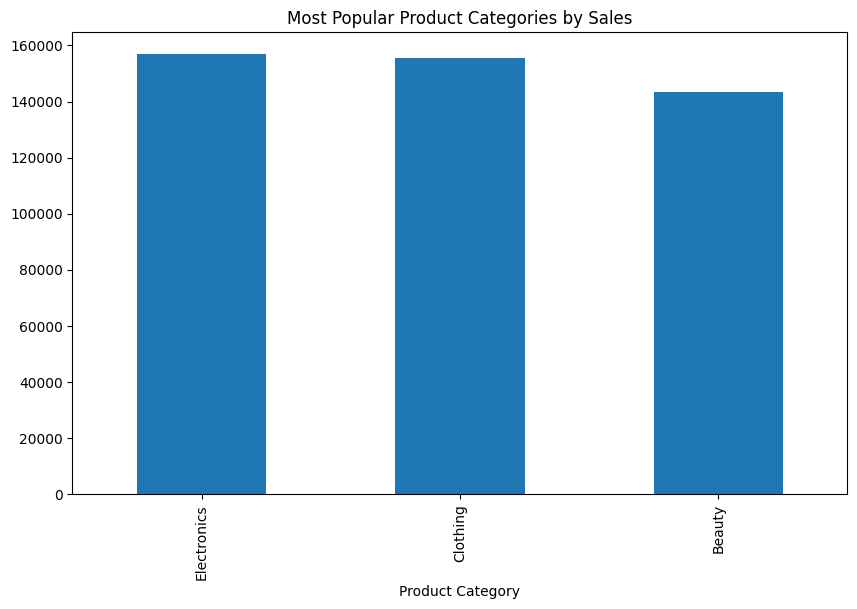

In [24]:
popular_products = retail_data.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
popular_products.plot(kind='bar', figsize=(10,6), title="Most Popular Product Categories by Sales")


Product Quantity Analysis

<Axes: title={'center': 'Quantity Purchased by Product Category'}, xlabel='Product Category'>

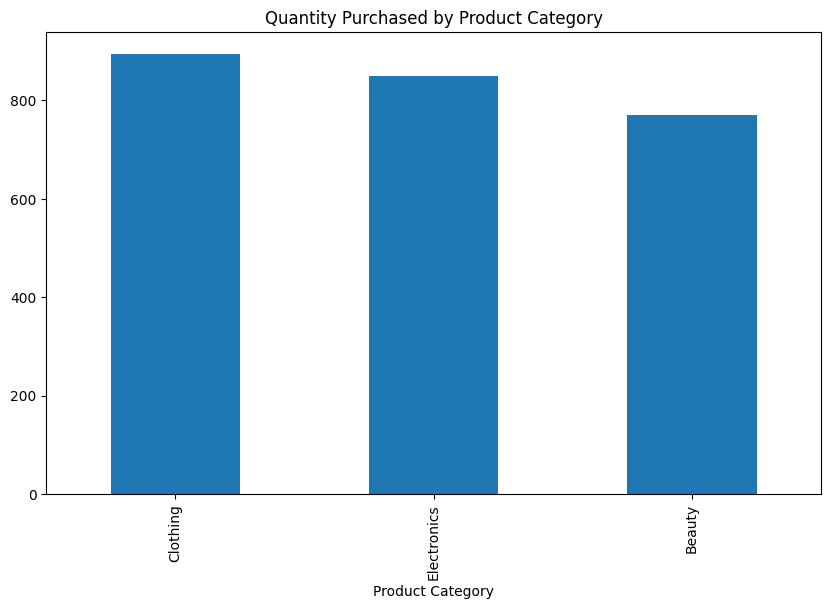

In [26]:
quantity_by_product = retail_data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
quantity_by_product.plot(kind='bar', figsize=(10,6), title="Quantity Purchased by Product Category")


Gender-Based Insights 
Sales Distribution by Gender

<Axes: title={'center': 'Sales Distribution by Gender'}, xlabel='Gender'>

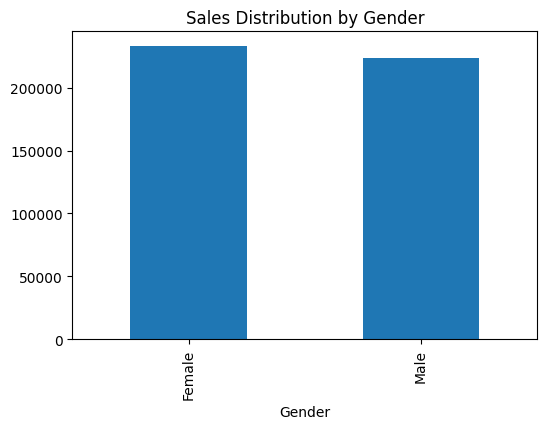

In [25]:
gender_sales_distribution = retail_data.groupby('Gender')['Total Amount'].sum()
gender_sales_distribution.plot(kind='bar', figsize=(6,4), title="Sales Distribution by Gender")


Final Insights:


1) Sales Trends: Sales increase significantly during the holiday season and on weekends.

2) Customer Demographics: Female customers and those aged 46-65 contribute the most to sales.

3) Product Insights: Clothing is the top-selling category. Groceries, while bought in large quantities, generate lower total revenue.

4) High-Value Customers: The top 10% of customers account for a substantial portion of the revenue.

Recommendations


1) Marketing Strategies:

Targeted Promotions for Female Customers: Since female customers contribute significantly to sales, design marketing campaigns and special promotions that specifically cater to their preferences and shopping behaviors.

Age-Specific Marketing: Focus on the 46-65 age group with tailored offers and product recommendations, as this demographic shows higher spending patterns.


2) Product and Inventory Management:

Increase Inventory for Clothing: Given that clothing is the top-selling category, ensure ample stock is available, especially during peak shopping periods or promotional events.

Bundle Deals for Groceries: While groceries generate lower total revenue, their high purchase volume suggests bundling offers or discount promotions could increase overall sales and attract more customers.


3)Customer Retention:

Loyalty Programs for High-Value Customers: Develop loyalty programs or reward schemes for the top 10% of high-value customers to encourage repeat purchases and foster brand loyalty.

Exclusive Offers: Provide exclusive deals or early access to sales for high-value customers to maintain their engagement and maximize their spending.


4)Seasonal and Trend-Based Promotions:

Seasonal Sales for Key Categories: Plan seasonal promotions focused on clothing and other high-performing product categories to capitalize on their popularity.

Strategic Inventory Planning: Align inventory and marketing strategies with identified sales trends to optimize stock levels and avoid overstock or stockouts during peak times.